# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [1]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


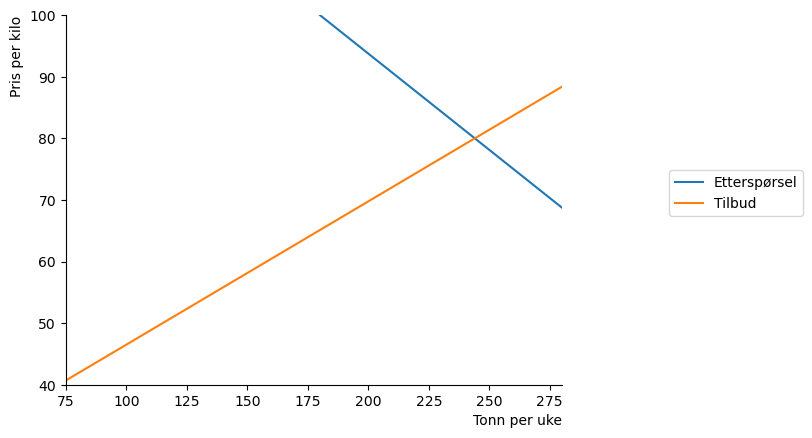

In [3]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));


   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


Oppgave 1: Jeg starter med å plotte og legger in 0.25 som andre argument i tilbuds funskjonen. 

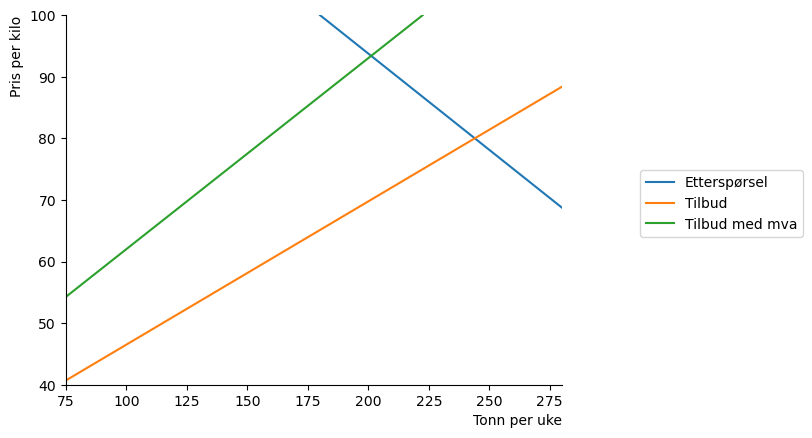

In [4]:



fig, ax = create_ax()

# plott funksjonene


ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 1/4),p_num, label='Tilbud med mva')
ax.legend(bbox_to_anchor=(1.5,0.6));



Denne grafen har brattere helning pga prisen er høyere med 25%. Når pris er 75 før mva så er prisen med mva 25% høyere.

Oppgave 2: Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.

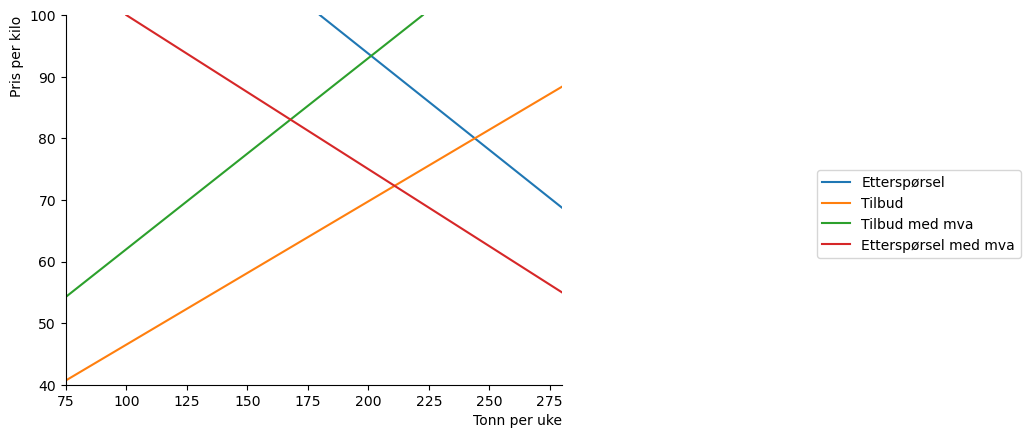

In [5]:
def x_d_mva(p,t):
    return 500 - 3.2*p*(1+t)
fig, ax = create_ax()

# plott funksjonene


ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')


ax.plot(x_s(p_num, 1/4),p_num, label='Tilbud med mva')
ax.plot(x_d_mva(p_num, 1/4),p_num, label='Etterspørsel med mva')

ax.legend(bbox_to_anchor=(1.5,0.6));


In [6]:
# definer symboler i sympy

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt




likevekt=sp.Eq(x_d(p),x_s(p,0))
uten_mva=sp.solve(likevekt,p)

likevekt_mva=sp.Eq(x_d(p),x_s(p,1/4))
med_mva=sp.solve(likevekt_mva,p)
print(f'''Prisen med mva er {med_mva[0]}, og prisen i likevekt uten mva er {uten_mva[0]}''')

Prisen med mva er 93.3852140077821, og prisen i likevekt uten mva er 80.0000000000000


In [7]:
def x_d(p, T):
    return 500 - 3.2*p*(1+T)

eq_cond=sp.Eq(x_d(p,T),x_s(p,t))


# løs for p
p_eq=sp.solve(eq_cond,p)

# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],t)



In [8]:
p_eq_fn=sp.lambdify((t,T), p_eq[0])

p_eq_fn(t, T)

x_eq_fn=sp.lambdify((t,T),x_eq)

x_eq_fn(t,T)

(25800.0 - 25800.0*t)/(32.0*T - 43.0*t + 75.0) - 100

In [9]:
pris_med_mva = np.round(p_eq_fn(1/4,0), 2)
pris_uten_mva = np.round(p_eq_fn(0,0), 2)



In [10]:
kvantum_med_mva = np.round(x_eq_fn(1/4, 0), 2)
kvantum_uten_mva = np.round(x_eq_fn(0,0), 2)

print(pris_uten_mva)
print(kvantum_uten_mva)

print(pris_med_mva)
print(kvantum_med_mva)

80.0
244.0
93.39
201.17


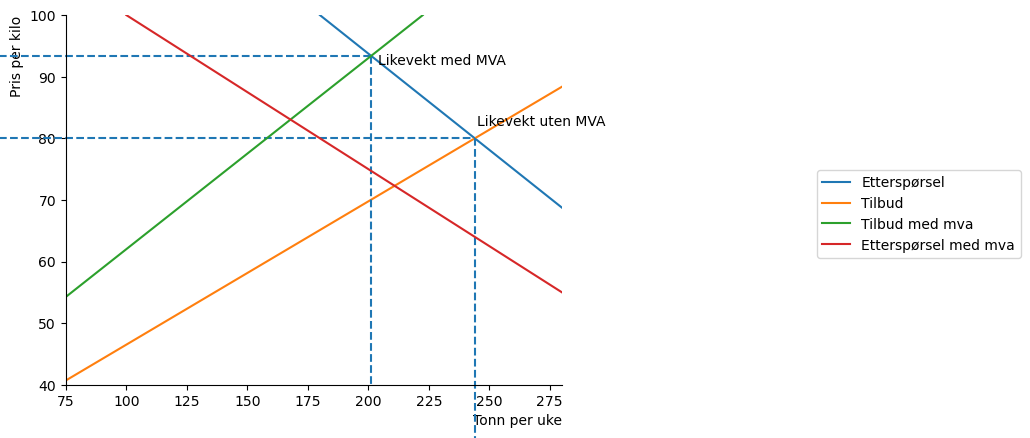

In [11]:
fig, ax = create_ax()

# plott funksjonene


ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.hlines(p_eq_fn(0,0),0,244, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(0,0),80,0, linestyles='dashed', clip_on=False)


ax.hlines(p_eq_fn(1/4, 0),201.17,0, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(1/4, 0),93.39,40, linestyles='dashed', clip_on=False)



ax.plot(x_s(p_num, 1/4),p_num, label='Tilbud med mva')
ax.plot(x_d_mva(p_num, 1/4),p_num, label='Etterspørsel med mva')


# Vis likevektskvantum før og etter
ax.text(245, 82, "Likevekt uten MVA")
ax.text(204,92, "Likevekt med MVA")

ax.legend(bbox_to_anchor=(1.5,0.6));

3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.


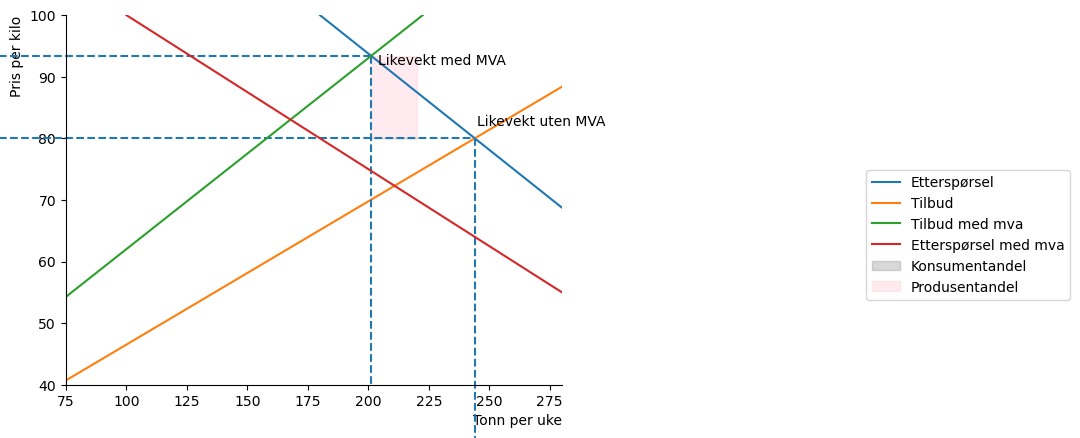

In [12]:
# vi kan illustrere hvem som betaler hva av avgiften
p_0 = p_eq_fn(0,0)

q=np.linspace (220, x_eq_fn(1/4,0), 100)



ax.fill_between(q,pris_uten_mva,p_0, color = "gray",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q,p_0,pris_med_mva, color = "pink",alpha = 0.3,label='Produsentandel')

ax.legend(bbox_to_anchor=(1.6,0.6))

fig